In [9]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy.sql import text
from sqlalchemy import create_engine

In [10]:
plt.style.use('seaborn')

/tmp/ipykernel_10635/240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [11]:
with open('creds.json') as f:
    creds = json.load(f)

user = creds['user']
password = creds['password']
host = creds['host']
port = creds['port']


In [12]:
e = create_engine(f'mysql+pymysql://{user}:{password}@{host}:{port}/advertise_data', echo = False)

In [13]:
def get_query_df(query):
    with e.connect() as con:
        q = text(query)
        df = pd.read_sql_query(q,con=con)
        try:df['date'] = pd.to_datetime(df['date'])
        except: pass
    return df

In [14]:
df = get_query_df(
    '''
SELECT
    date_start as date,
    SUM(clicks),
    AVG(clicks),
    SUM(cpc),
    AVG(cpc),
    SUM(cpm),
    AVG(cpm)
from facebook
GROUP BY date_start;
    '''
)

In [15]:
df.shape

(26, 7)

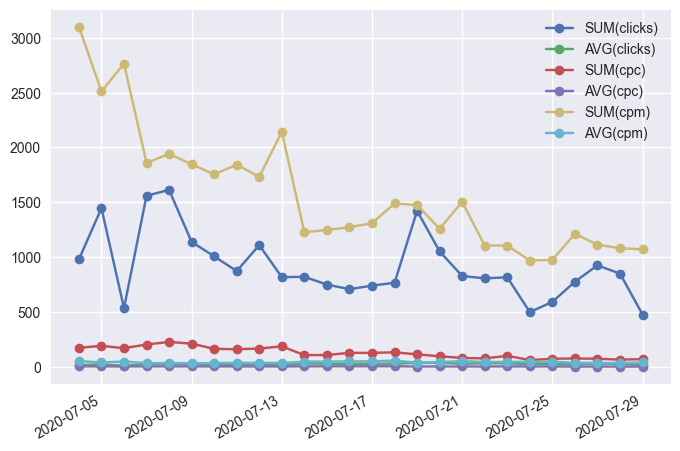

In [16]:
date='date'
for i in df.loc[:, df.columns != date]:
    plt.plot_date(df[date], df[i],label=i,linestyle='solid')
plt.legend()
plt.gcf().autofmt_xdate()
# plt.xticks(rotation=45)
plt.show()

In [17]:
df = get_query_df(
    '''
SELECT
    day as date,
    SUM(clicks),
    AVG(clicks),
    SUM(conversions),
    AVG(conversions),
    SUM(cost),
    AVG(cost)
FROM google
GROUP BY day;

    '''
)

In [18]:
df.shape

(41, 7)

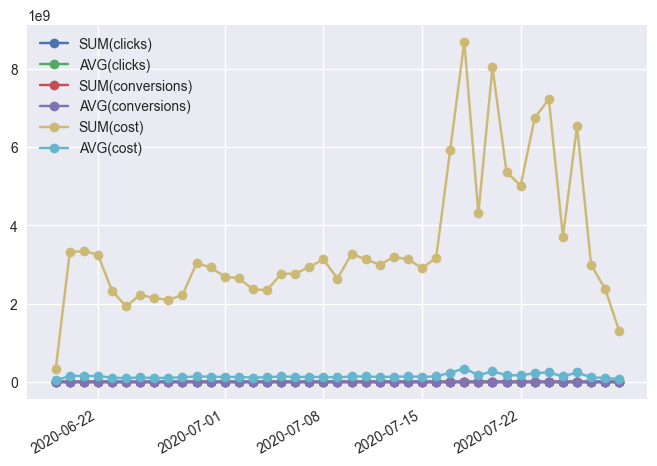

In [19]:
date='date'
for i in df.loc[:, df.columns != date]:
    plt.plot_date(df[date], df[i],label=i,linestyle='solid')
plt.legend()
plt.gcf().autofmt_xdate()
# plt.xticks(rotation=45)
plt.show()

In [20]:
df = get_query_df(
    '''
SELECT
    date_start as date,
    SUM(clicks), (
        select
            SUM(fb.clicks) AS one_day_click_sum
        from facebook as fb
        where
            DATE(fb.date_start) = DATE(
                DATE_SUB(
                    facebook.date_start,
                    INTERVAL 1 DAY
                )
            )
    ) as one_day_click_sum, (
        select
            SUM(fb.clicks) AS seven_day_click_sum
        from facebook as fb
        where
            DATE(fb.date_start) = DATE(
                DATE_SUB(
                    facebook.date_start,
                    INTERVAL 7 DAY
                )
            )
    ) as seven_day_click_sum
from facebook
GROUP BY date_start
ORDER BY date_start;
    '''
)

In [21]:
df

,date,SUM(clicks),one_day_click_sum,seven_day_click_sum
0,2020-07-04,979.0,NaN,NaN
1,2020-07-05,1447.0,979.0,NaN
2,2020-07-06,535.0,1447.0,NaN
3,2020-07-07,1560.0,535.0,NaN
4,2020-07-08,1613.0,1560.0,NaN
5,2020-07-09,1139.0,1613.0,NaN
6,2020-07-10,1007.0,1139.0,NaN
7,2020-07-11,873.0,1007.0,979.0
8,2020-07-12,1110.0,873.0,1447.0
9,2020-07-13,817.0,1110.0,535.0


In [22]:
df = get_query_df(
    '''
SELECT day as date, SUM(clicks), (
        select
            SUM(gl.clicks) AS one_day_click_sum
        from google as gl
        where
            DATE(gl.day) = DATE(
                DATE_SUB(google.day, INTERVAL 1 DAY)
            )
    ) as one_day_click_sum, (
        select
            SUM(gl.clicks) AS seven_day_click_sum
        from google as gl
        where
            DATE(gl.day) = DATE(
                DATE_SUB(google.day, INTERVAL 7 DAY)
            )
    ) as seven_day_click_sum
from google
GROUP BY day
ORDER BY day;
    '''
)

In [23]:
df

,date,SUM(clicks),one_day_click_sum,seven_day_click_sum
0,2020-06-19,78.0,NaN,NaN
1,2020-06-20,1874.0,78.0,NaN
2,2020-06-21,1973.0,1874.0,NaN
3,2020-06-22,2033.0,1973.0,NaN
4,2020-06-23,1913.0,2033.0,NaN
5,2020-06-24,1437.0,1913.0,NaN
6,2020-06-25,1438.0,1437.0,NaN
7,2020-06-26,2058.0,1438.0,78.0
8,2020-06-27,1319.0,2058.0,1874.0
9,2020-06-28,1846.0,1319.0,1973.0


In [24]:
df = get_query_df(
    '''
SELECT (
        CASE
            WHEN campaign_name LIKE '%pros_' THEN 'pros'
            WHEN campaign_name LIKE '%PROS_' THEN 'pros'
            WHEN campaign_name LIKE '_pros%' THEN 'pros'
            WHEN campaign_name LIKE '_PROS%' THEN 'pros'
            WHEN campaign_name LIKE '%rt_' THEN 'rt'
            WHEN campaign_name LIKE '%RT_' THEN 'rt'
            WHEN campaign_name LIKE '_rt%' THEN 'rt'
            WHEN campaign_name LIKE '_RT%' THEN 'rt'
            ELSE 'remaining'
        END
    ) as campaign_name,
    SUM(clicks * cpc) cost_sum,
    AVG(clicks * cpc) cost_avg
FROM facebook
GROUP by (
        CASE
            WHEN campaign_name LIKE '%pros_' THEN 'pros'
            WHEN campaign_name LIKE '%PROS_' THEN 'pros'
            WHEN campaign_name LIKE '_pros%' THEN 'pros'
            WHEN campaign_name LIKE '_PROS%' THEN 'pros'
            WHEN campaign_name LIKE '%rt_' THEN 'rt'
            WHEN campaign_name LIKE '%RT_' THEN 'rt'
            WHEN campaign_name LIKE '_rt%' THEN 'rt'
            WHEN campaign_name LIKE '_RT%' THEN 'rt'
            ELSE 'remaining'
        END
    );

    '''
)

In [25]:
df

,campaign_name,cost_sum,cost_avg
0,pros,38284.810552,65.332441
1,rt,15266.619896,47.708187


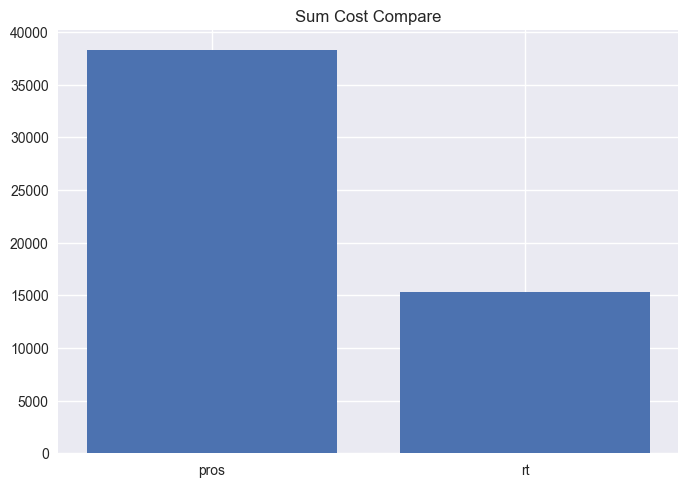

In [26]:
plt.bar(df['campaign_name'],df['cost_sum'])
plt.title('Sum Cost Compare')
plt.show()

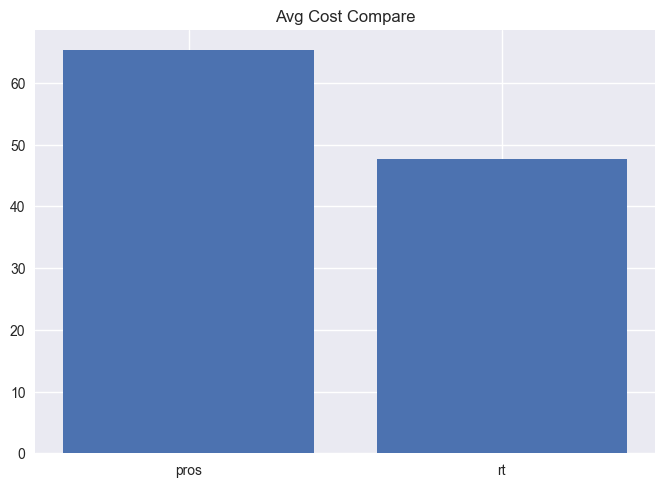

In [27]:
plt.bar(df['campaign_name'],df['cost_avg'])
plt.title('Avg Cost Compare')
plt.show()

In [31]:
df = get_query_df(
    '''
SELECT (
        CASE
            WHEN campaign LIKE '%pros_' THEN 'pros'
            WHEN campaign LIKE '%PROS_' THEN 'pros'
            WHEN campaign LIKE '_pros%' THEN 'pros'
            WHEN campaign LIKE '_PROS%' THEN 'pros'
            WHEN campaign LIKE '%rt_' THEN 'rt'
            WHEN campaign LIKE '%RT_' THEN 'rt'
            WHEN campaign LIKE '_rt%' THEN 'rt'
            WHEN campaign LIKE '_RT%' THEN 'rt'
            ELSE 'remaining'
        END
    ) as campaign_name,
    SUM(cost) cost_sum,
    AVG(cost) cost_avg
FROM google
GROUP by (
        CASE
            WHEN campaign LIKE '%pros_' THEN 'pros'
            WHEN campaign LIKE '%PROS_' THEN 'pros'
            WHEN campaign LIKE '_pros%' THEN 'pros'
            WHEN campaign LIKE '_PROS%' THEN 'pros'
            WHEN campaign LIKE '%rt_' THEN 'rt'
            WHEN campaign LIKE '%RT_' THEN 'rt'
            WHEN campaign LIKE '_rt%' THEN 'rt'
            WHEN campaign LIKE '_RT%' THEN 'rt'
            ELSE 'remaining'
        END
    );
    '''
)

In [32]:
df

,campaign_name,cost_sum,cost_avg
0,pros,9.070175e+10,1.252787e+08
1,remaining,4.888774e+10,2.432226e+08
2,rt,3.900873e+09,5.201164e+07


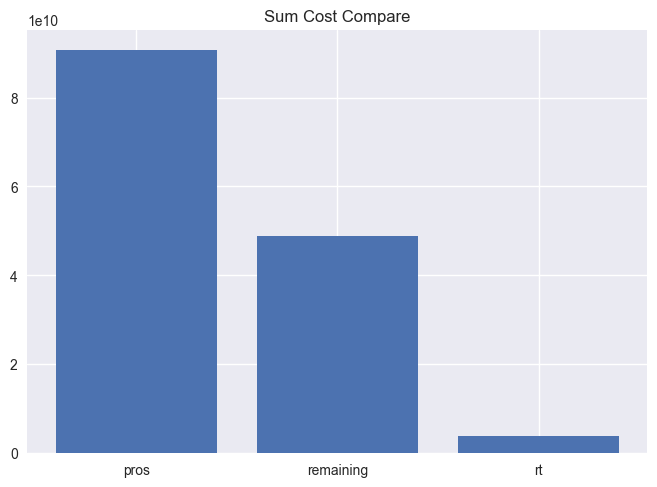

In [33]:
plt.bar(df['campaign_name'],df['cost_sum'])
plt.title('Sum Cost Compare')
plt.show()

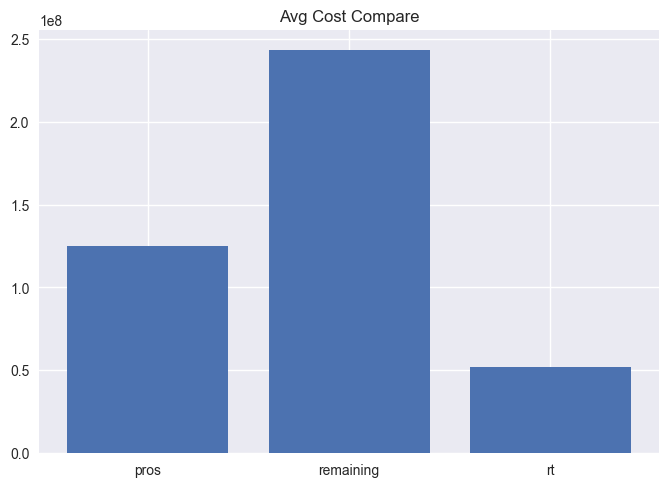

In [34]:
plt.bar(df['campaign_name'],df['cost_avg'])
plt.title('Avg Cost Compare')
plt.show()